In [1]:
import pandas as pd

data = pd.read_csv("extracted_featurePoly.csv")
data.head()

,Unnamed: 0,ID,Timestamp,X,Y,Button,Duration,User_ID,Delta_X,Delta_Y,...,Acceleration,Angle,Jerk,Curvature,Direction_Change,Is_Stop,Stop_Duration,Dominant_Frequency,Power_Low_Frequencies,Power_High_Frequencies
0,68695,004-poly-315,1.678910e+09,1509.0,662.0,-1.0,-1.0,4.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,-1.0,NaN,NaN,NaN
1,68696,004-poly-315,1.678910e+09,1488.0,646.0,-1.0,-1.0,4.0,-21.0,-16.0,...,26.400758,-2.490516,26.400758,-0.094335,1.0,0.0,-0.0,NaN,NaN,NaN
2,68697,004-poly-315,1.678910e+09,1466.0,630.0,-1.0,-1.0,4.0,-22.0,-16.0,...,0.802183,-2.512796,-25.598574,-0.000819,1.0,0.0,-0.0,NaN,NaN,NaN
3,68698,004-poly-315,1.678910e+09,1438.0,612.0,-1.0,-1.0,4.0,-28.0,-18.0,...,6.083693,-2.570255,5.281509,-0.001726,1.0,0.0,-0.0,NaN,NaN,NaN
4,68699,004-poly-315,1.678910e+09,1408.0,590.0,-1.0,-1.0,4.0,-30.0,-22.0,...,3.915517,-2.508844,-2.168176,0.001651,1.0,0.0,-0.0,NaN,NaN,NaN


In [2]:
# List of columns to select
selected_columns = ['Y', 'Stop_Duration', 'X', 'Jerk', 'Direction_Change', 'Movement_Distance', 'Acceleration', 'Button', 'Angle', 'ID']

# Select the desired columns
df_selected = data[selected_columns]
df_selected.head()

,Y,Stop_Duration,X,Jerk,Direction_Change,Movement_Distance,Acceleration,Button,Angle,ID
0,662.0,-1.0,1509.0,0.000000,0.0,0.000000,0.000000,-1.0,0.000000,004-poly-315
1,646.0,-0.0,1488.0,26.400758,1.0,26.400758,26.400758,-1.0,-2.490516,004-poly-315
2,630.0,-0.0,1466.0,-25.598574,1.0,27.202941,0.802183,-1.0,-2.512796,004-poly-315
3,612.0,-0.0,1438.0,5.281509,1.0,33.286634,6.083693,-1.0,-2.570255,004-poly-315
4,590.0,-0.0,1408.0,-2.168176,1.0,37.202150,3.915517,-1.0,-2.508844,004-poly-315


In [3]:
df_selected.dropna(inplace=True)
df_selected

C:\Users\drago\AppData\Local\Temp\ipykernel_2116\3290963421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


,Y,Stop_Duration,X,Jerk,Direction_Change,Movement_Distance,Acceleration,Button,Angle,ID
0,662.0,-1.0,1509.0,0.000000,0.0,0.000000,0.000000,-1.0,0.000000,004-poly-315
1,646.0,-0.0,1488.0,26.400758,1.0,26.400758,26.400758,-1.0,-2.490516,004-poly-315
2,630.0,-0.0,1466.0,-25.598574,1.0,27.202941,0.802183,-1.0,-2.512796,004-poly-315
3,612.0,-0.0,1438.0,5.281509,1.0,33.286634,6.083693,-1.0,-2.570255,004-poly-315
4,590.0,-0.0,1408.0,-2.168176,1.0,37.202150,3.915517,-1.0,-2.508844,004-poly-315
...,...,...,...,...,...,...,...,...,...,...
549121,541.0,-0.0,1465.0,-1.000000,0.0,2.000000,-1.000000,-1.0,3.141593,020-poly-403
549122,541.0,-0.0,1463.0,1.000000,0.0,2.000000,0.000000,-1.0,3.141593,020-poly-403
549123,541.0,-0.0,1462.0,-1.000000,0.0,1.000000,-1.000000,-1.0,3.141593,020-poly-403
549124,541.0,-0.0,1461.0,1.000000,0.0,1.000000,0.000000,-1.0,3.141593,020-poly-403


# LabelENcoder

In [4]:
from sklearn.preprocessing import LabelEncoder

df = df_selected

# Use LabelEncoder to convert User_ID into numerical labels
encoder = LabelEncoder()
df['User_ID'] = encoder.fit_transform(df['ID'])

# Print the mapping for reference
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Label mapping:", mapping)

Label mapping: {'004-poly-315': 0, '005-poly-315': 1, '007-poly-317': 2, '008-poly-317': 3, '009-poly-320': 4, '010-poly-317': 5, '011-poly-326': 6, '012-poly-326': 7, '013-poly-326': 8, '014-poly-328': 9, '015-poly-328': 10, '018-poly-330': 11, '019-poly-403': 12, '020-poly-403': 13}


C:\Users\drago\AppData\Local\Temp\ipykernel_2116\2500150626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_ID'] = encoder.fit_transform(df['ID'])


In [5]:
df.drop(columns='ID', inplace=True)

C:\Users\drago\AppData\Local\Temp\ipykernel_2116\1054706017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='ID', inplace=True)


In [6]:
df.head()

,Y,Stop_Duration,X,Jerk,Direction_Change,Movement_Distance,Acceleration,Button,Angle,User_ID
0,662.0,-1.0,1509.0,0.000000,0.0,0.000000,0.000000,-1.0,0.000000,0
1,646.0,-0.0,1488.0,26.400758,1.0,26.400758,26.400758,-1.0,-2.490516,0
2,630.0,-0.0,1466.0,-25.598574,1.0,27.202941,0.802183,-1.0,-2.512796,0
3,612.0,-0.0,1438.0,5.281509,1.0,33.286634,6.083693,-1.0,-2.570255,0
4,590.0,-0.0,1408.0,-2.168176,1.0,37.202150,3.915517,-1.0,-2.508844,0


# Relabel

In [7]:
# Relabel the User_ID column USER20
df['User_ID'] = df['User_ID'].apply(lambda x: 0 if x == 13 else 1)

# Check the distribution of the relabeled User_ID
user_distribution = df['User_ID'].value_counts()

user_distribution

C:\Users\drago\AppData\Local\Temp\ipykernel_2116\2827572082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_ID'] = df['User_ID'].apply(lambda x: 0 if x == 13 else 1)


1    512359
0     36767
Name: User_ID, dtype: int64

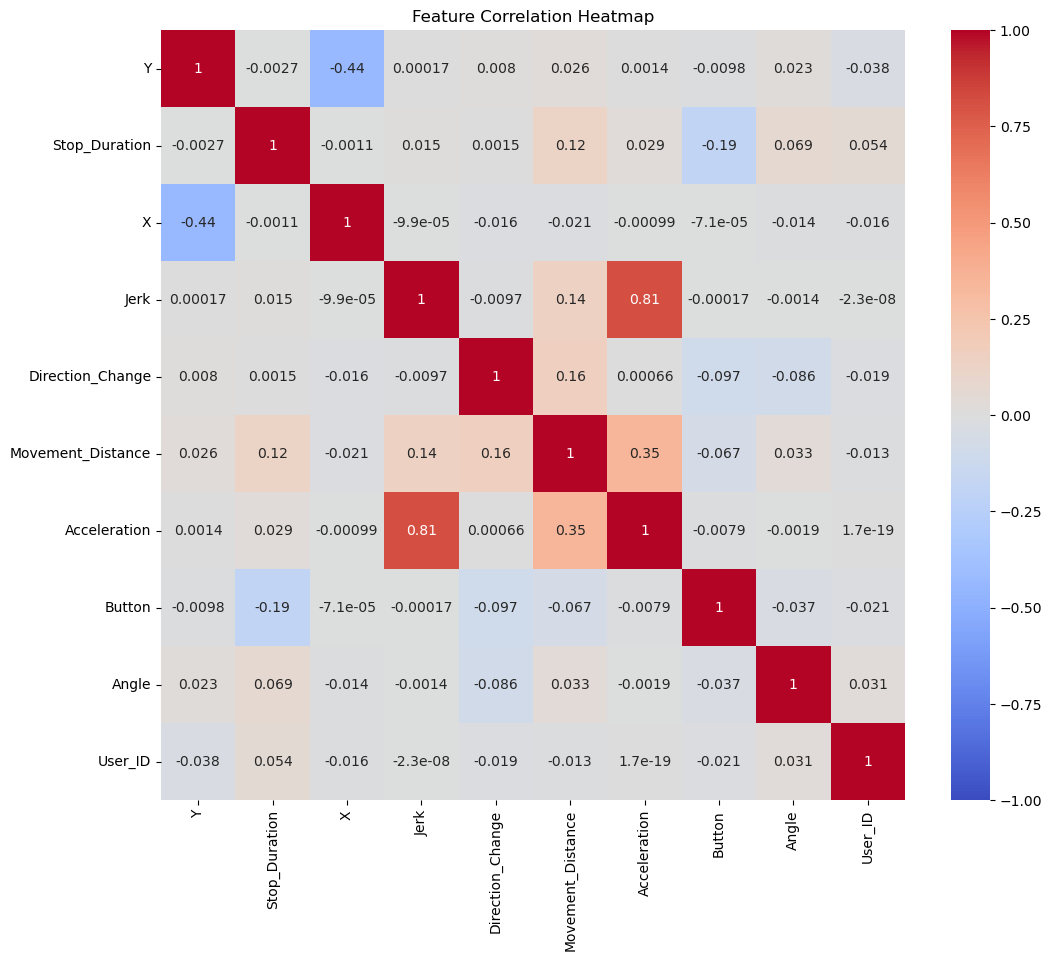

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

# Normalize

In [9]:
df.columns

Index(['Y', 'Stop_Duration', 'X', 'Jerk', 'Direction_Change',
       'Movement_Distance', 'Acceleration', 'Button', 'Angle', 'User_ID'],
      dtype='object')

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the features
features = ['Y', 'Stop_Duration', 'X', 'Jerk', 'Direction_Change', 'Movement_Distance', 'Acceleration', 'Button', 'Angle']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])


C:\Users\drago\AppData\Local\Temp\ipykernel_2116\334590246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = scaler.fit_transform(df[features])


# Sequencing

In [11]:
import numpy as np

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length), :-1]
        y = data[i+seq_length][-1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(df.values, 40)

# SPlit Data

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import tensorflow as tf

#Meetric
precission = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
AUC_ROC = tf.keras.metrics.AUC(curve='ROC')

# 3. Build the GRU model
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[precission, recall, AUC_ROC])


In [14]:
# 4. Train the model
model.fit(X_train, y_train, epochs=15, batch_size=256, validation_data=(X_test, y_test))


Epoch 1/15
1716/1716 [==============================] - 321s 185ms/step - loss: 0.2347 - precision: 0.9334 - recall: 0.9993 - auc: 0.6601 - val_loss: 0.2211 - val_precision: 0.9322 - val_recall: 0.9999 - val_auc: 0.7702
Epoch 2/15
1716/1716 [==============================] - 336s 196ms/step - loss: 0.2060 - precision: 0.9376 - recall: 0.9966 - auc: 0.7841 - val_loss: 0.2044 - val_precision: 0.9357 - val_recall: 0.9987 - val_auc: 0.8158
Epoch 3/15
1716/1716 [==============================] - 328s 191ms/step - loss: 0.1801 - precision: 0.9457 - recall: 0.9937 - auc: 0.8486 - val_loss: 0.1781 - val_precision: 0.9451 - val_recall: 0.9949 - val_auc: 0.8576
Epoch 5/15
1716/1716 [==============================] - 334s 195ms/step - loss: 0.1137 - precision: 0.9671 - recall: 0.9928 - auc: 0.9443 - val_loss: 0.1024 - val_precision: 0.9723 - val_recall: 0.9919 - val_auc: 0.9564
Epoch 11/15
1716/1716 [==============================] - 336s 196ms/step - loss: 0.1031 - precision: 0.9704 - recall: 0.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 40, 50)            9150      
                                                                 
 dropout (Dropout)           (None, 40, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 40, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 40, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 39,801
Trainable params: 39,801
Non-traina

In [16]:
model.save("GRU_poly_USER20.h5")

# Evaluation

## Train

In [17]:
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_probs = model.predict(X_train)

# Convert probabilities to binary outputs
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

# Calculate F1 score
f1 = f1_score(y_train, y_pred)
print(f"F1 Score: {f1}")

13728/13728 [==============================] - 153s 11ms/step
F1 Score: 0.991273420287568


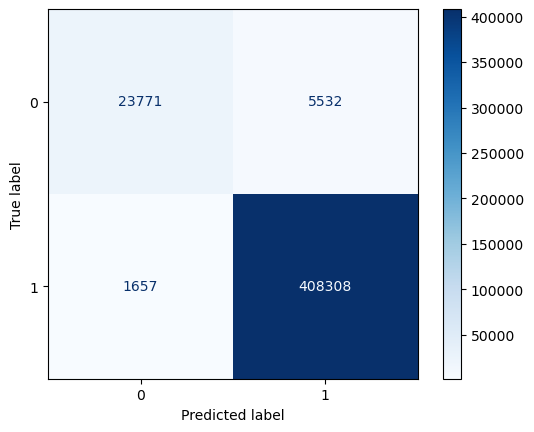

In [18]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate and plot confusion matrix
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# [[TN, FP],
# [FN, TP]]

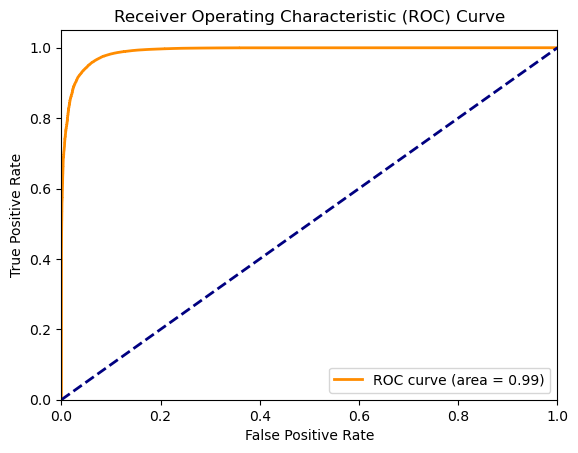

In [19]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Test

In [20]:
loss, precision, recall, AUC = model.evaluate(X_test, y_test)

3432/3432 [==============================] - 46s 13ms/step - loss: 0.0584 - precision: 0.9846 - recall: 0.9952 - auc: 0.9861


In [21]:
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary outputs
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

3432/3432 [==============================] - 44s 13ms/step
F1 Score: 0.9898834802382873


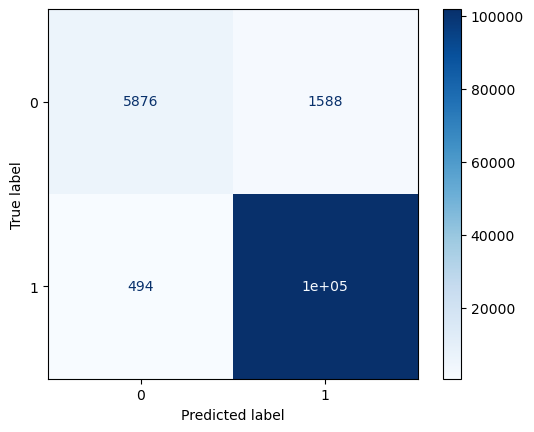

In [22]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# [[TN, FP],
# [FN, TP]]

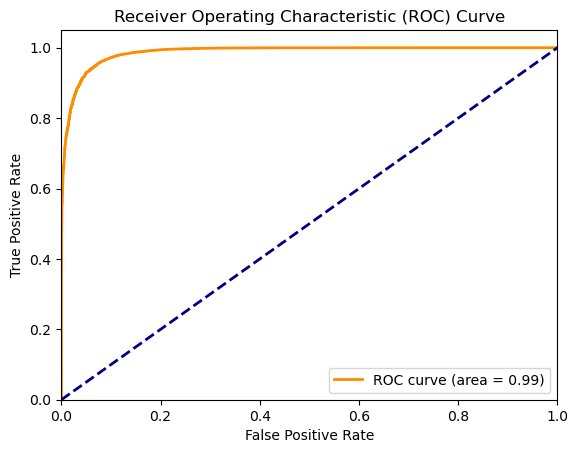

In [23]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()